<a href="https://colab.research.google.com/github/MOHD-TAUFIQUE/Natural-Language-Processing-NLP---Notes-Intuition-Coding/blob/main/Copy_of_Individual_Notebook_Final_2_Coronavirus_Tweet_Sentiment_Analysis_CP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

# **1.  Importing Libraries** 

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [2]:
# Importing libraries for text preprocessing and NLP
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# **2.  Adding Dataset**

In [3]:
# Importing the dataset in CSV format directly from the GitHub repository using the encoding of ISO-8859-1
tweet_df = pd.read_csv('https://raw.githubusercontent.com/Soni-Test/Sentiment-Analysis-Supervised-ML-Classification-Predicting-sentiment-of-COVID-19-tweets/main/Coronavirus%20Tweets.csv', encoding="ISO-8859-1")

In [4]:
tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
tweet_df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [6]:
tweet_df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [7]:
# Looking for shape of dataset 
tweet_df.shape

(41157, 6)

In [8]:
# Checking the information of dataset
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [9]:
# Looking for unique values in columns of dataset
for i in tweet_df.columns:
  print("Total Unique Values in", i, "-", len(tweet_df[i].unique()))

Total Unique Values in UserName - 41157
Total Unique Values in ScreenName - 41157
Total Unique Values in Location - 12221
Total Unique Values in TweetAt - 30
Total Unique Values in OriginalTweet - 41157
Total Unique Values in Sentiment - 5


In [10]:
# Looking for Columns in dataset
tweet_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [11]:
# Checking null value
tweet_df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [12]:
# Checking  missing values in 'Location' column
miss_value = tweet_df['Location'].isnull().sum()/(tweet_df.shape[0]) * 100
print("We have {:.2f} % of missing values in 'Location' Column".format(miss_value))

We have 20.87 % of missing values in 'Location' Column


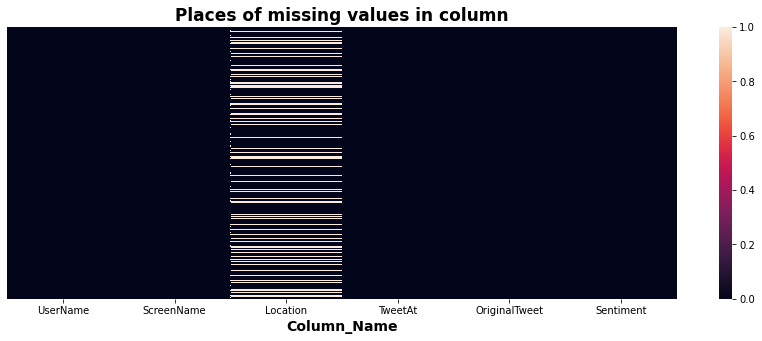

In [13]:
# Plot No- 1
# Plotting heatmap of different columns to check the missing values
plt.figure(figsize=(15, 5))
sns.heatmap(tweet_df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

# **3.  Exploratory Data Analysis (EDA)**

## **Exploring the important Columns** 


*  ### **Location**
*  ### **TweetAt**
*  ### **Sentiment**
*  ### **OriginalTweet**



**Short Overview:**The original dataset has 6 columns and 41157 rows.
In order to analyse various sentiments, We require just  only two columns named Original Tweet and Sentiment. There are five types of sentiments- Extremely Negative, Negative, Neutral, Positive and Extremely Positive.The columns such as “UserName” and “ScreenName” does not give any meaningful insights for our analysis. All tweets data collected from the months of March and April 2020. Bar plot shows us the number of unique values in each column.There are various #hashtags in tweets column which we will like to explore.People also have different sentiments about various issues shows us their optimism during pandemic times.

## **A. Location**
  



In [14]:
# Looking the count value of different Location 
tweet_df.Location.value_counts().head(15)

London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
Canada                     191
England, United Kingdom    191
Toronto, Ontario           160
Global                     159
Name: Location, dtype: int64

In [15]:
# Looking for the unique values in the variable 
tweet_df.Location.unique()

array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

In [16]:
# Describing the Location 
tweet_df.Location.describe()

count      32567
unique     12220
top       London
freq         540
Name: Location, dtype: object

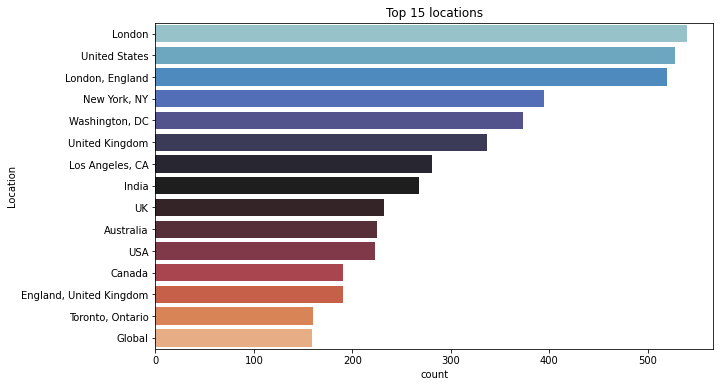

In [17]:
# Plot No- 2
# Looking for top 15 Countries in Countplot
plt.figure(figsize=(10,6))
sns.countplot(y=tweet_df.Location, order = tweet_df.Location.value_counts().iloc[:15].index, palette ='icefire')
plt.title('Top 15 locations')
plt.show()

* ### The above count plot shows the top 15 locations in the dataset.
* ### Plot shows the London to be the maximum among all the different locations.
* ### Second place is of United States and India ranks at 8th place. 

In [18]:
# Creating dataframe for location
location = pd.DataFrame(tweet_df['Location'].value_counts().sort_values(ascending=False))
location = location.rename(columns={'Location':'count'})

In [19]:
# Importing required library
import plotly.graph_objects as go

In [20]:
# Plot No- 3
# Plotting the interactive pie plot in percentage of Top 15 locations 
data = {
   "values": location['count'][:15],
   "labels": location.index[:15],
   "domain": {"column": 0},
   "name": "Location Name",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Percentage of Location</b>", legend=dict(x=0.1, y=1.0, orientation="v"))
data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()



*  ### The above pie plot shows the percentage wise Top 15 locations in the present dataset. 
*  ### Here we can again see London has the maximum percentage share of 11.7%, followed by United States with 11.4% and again London, England with 11.2%. 
*  ### India which is placed at 8th place shares the percentage of 5.8%.



## **B. Tweet Date**

In [21]:
# Count value of TweetAt (Tweeting date)
tweet_df['TweetAt'].value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [22]:
# Checking unique Tweet dates in TweetAt
tweet_df.TweetAt.unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

In [23]:
# Describing TweetAt
tweet_df.TweetAt.describe()

count          41157
unique            30
top       20-03-2020
freq            3448
Name: TweetAt, dtype: object

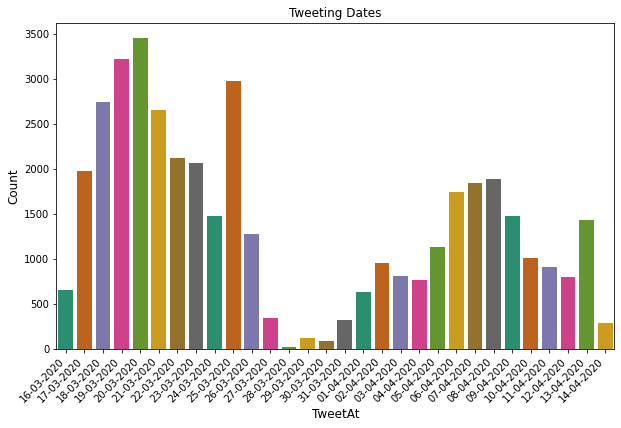

In [24]:
# Plot No- 4
# Distribution of Dates of Tweets
plt.figure(figsize=(10,6))
sns.countplot(x='TweetAt', data=tweet_df, palette ='Dark2')
plt.xticks(rotation=45, ha='right')
plt.title("Tweeting Dates")
plt.ylabel("Count", fontsize = 12)
plt.xlabel("TweetAt",fontsize = 12)
plt.show()

* ### The above count plot shows the overall distribution of different tweeting dates in the dataset. Starting from the mid-month of **March 2020** to mid-month of **April 2020**.
* ### From the we can find out that the date **20-03-2020** has the **maximum** count value among all the other occuring dates. 
* ### **Least** count value is for date **28-03-2020**. 
* ### The tweeting date ranges from **16-03-2020 to 14-04-2020**, which is approx **30 days** in total. 

## **C. Sentiment**

In [25]:
# Checking unique values in Sentiment
tweet_df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [26]:
# Describing the sentiments
tweet_df.Sentiment.describe()

count        41157
unique           5
top       Positive
freq         11422
Name: Sentiment, dtype: object

In [27]:
# Checking sentiment count value
tweet_df.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

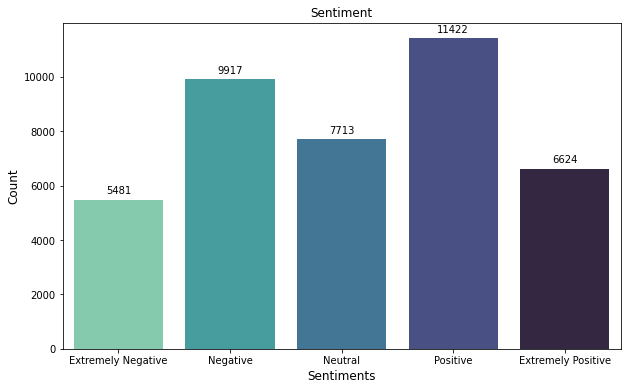

In [28]:
# Plot No- 5
# Plotting the Sentiments count value as countplot 
plt.figure(figsize=(10,6))
splot = sns.countplot(x='Sentiment', data=tweet_df, order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'], palette="mako_r")
# adding annotation
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0,9), textcoords = 'offset points')
plt.title("Sentiment")
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Sentiments",fontsize = 12)
plt.show()

* ### The above plot is showing the count value of different sentiments present in the dataset.
* ### The most common occuring sentiment is positive, followed by negative, neutral, extremely positive and least is extremely negative.  

### **Class Distribution of Each Sentiment Type**

In [29]:
# Copying the dataframe
tt_df = tweet_df.copy()
# tt_df['OriginalTweet'] = tt_df['text'] 

In [30]:
# Creating the new column 'Text'
tt_df['text'] = tt_df.OriginalTweet
tt_df["text"] = tt_df["text"].astype(str)

In [31]:
# Calculating the text count 
class_df = tt_df.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
class_df.style.background_gradient(cmap='viridis')

,Sentiment,text
4,Positive,11422
2,Negative,9917
3,Neutral,7713
1,Extremely Positive,6624
0,Extremely Negative,5481


### **Number of characters of each sentiments types**

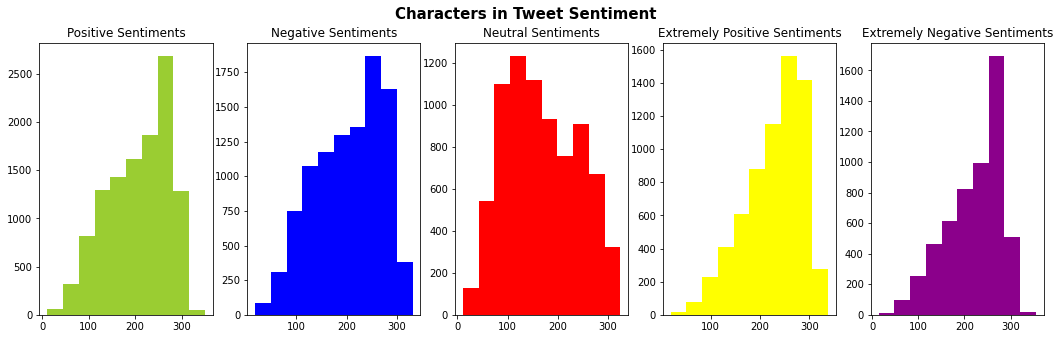

In [32]:
# Plot No - 6
# Plotting the number of characters for each tweet sentiment types
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(18,5))
tweet_len=tt_df[tt_df['Sentiment']=="Positive"]['text'].str.len()
ax1.hist(tweet_len,color='yellowgreen')
ax1.set_title('Positive Sentiments')

tweet_len=tt_df[tt_df['Sentiment']=="Negative"]['text'].str.len()
ax2.hist(tweet_len,color='blue')
ax2.set_title('Negative Sentiments')

tweet_len=tt_df[tt_df['Sentiment']=="Neutral"]['text'].str.len()
ax3.hist(tweet_len,color='red')
ax3.set_title('Neutral Sentiments')

tweet_len=tt_df[tt_df['Sentiment']=="Extremely Positive"]['text'].str.len()
ax4.hist(tweet_len,color='yellow')
ax4.set_title('Extremely Positive Sentiments')

tweet_len=tt_df[tt_df['Sentiment']=="Extremely Negative"]['text'].str.len()
ax5.hist(tweet_len,color='darkmagenta')
ax5.set_title('Extremely Negative Sentiments')


fig.suptitle("Characters in Tweet Sentiment", size=15,fontweight="bold")
# Showing the plot
plt.show()

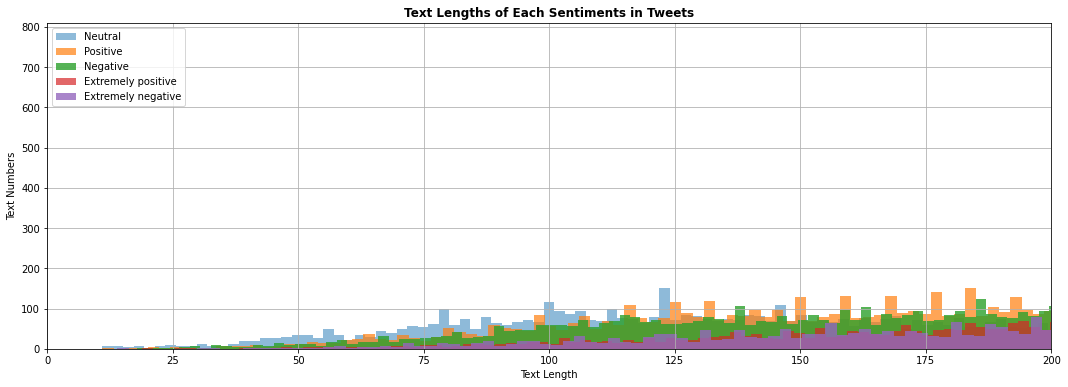

In [33]:
# Importing required library
from matplotlib.pylab import tile

# Writing the function
def length(text):    
    '''a function which returns the length of text'''
    return len(text)
tt_df['length'] = tt_df['text'].apply(length)

plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(tt_df[tt_df['Sentiment'] == "Neutral"]['length'], alpha = 0.5, bins=bins, label='Neutral')
plt.hist(tt_df[tt_df['Sentiment'] == "Positive"]['length'], alpha = 0.7, bins=bins, label='Positive')
plt.hist(tt_df[tt_df['Sentiment'] == "Negative"]['length'], alpha = 0.8, bins=bins, label='Negative')
plt.hist(tt_df[tt_df['Sentiment'] == "Extremely Positive"]['length'], alpha = 0.7, bins=bins, label='Extremely positive')
plt.hist(tt_df[tt_df['Sentiment'] == "Extremely Negative"]['length'], alpha = 0.8, bins=bins, label='Extremely negative')

# Plot No - 7
# Plotting the data 
plt.title('Text Lengths of Each Sentiments in Tweets', fontweight='bold')
plt.xlabel('Text Length')
plt.ylabel('Text Numbers')
plt.legend(loc='upper left')
plt.xlim(0,200)
plt.grid()
plt.show()

### **Average word length in a tweet**

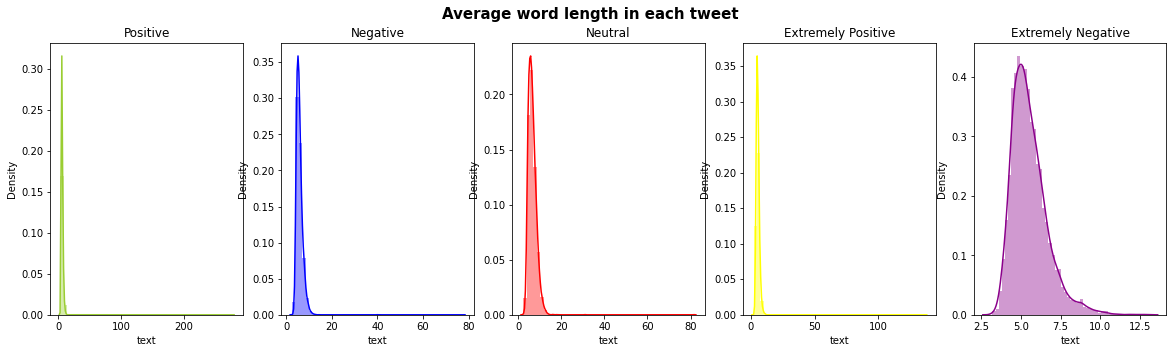

In [34]:
# Plot No - 8
# Finding the average word length in each tweet sentiment type. 
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(20,5))
word= tt_df[tt_df['Sentiment']=="Positive"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='yellowgreen')
ax1.set_title('Positive')

word= tt_df[tt_df['Sentiment']=="Negative"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='blue')
ax2.set_title('Negative')

word= tt_df[tt_df['Sentiment']=="Neutral"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='red')
ax3.set_title('Neutral')

word= tt_df[tt_df['Sentiment']=="Extremely Positive"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax4,color='yellow')
ax4.set_title('Extremely Positive')

word= tt_df[tt_df['Sentiment']=="Extremely Negative"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax5,color='darkmagenta')
ax5.set_title('Extremely Negative')

# Showing the Plot 

fig.suptitle('Average word length in each tweet', size=15,fontweight="bold")
plt.show()

### **Looking occurance times between different tweeting date and sentiments associated with that particular date**

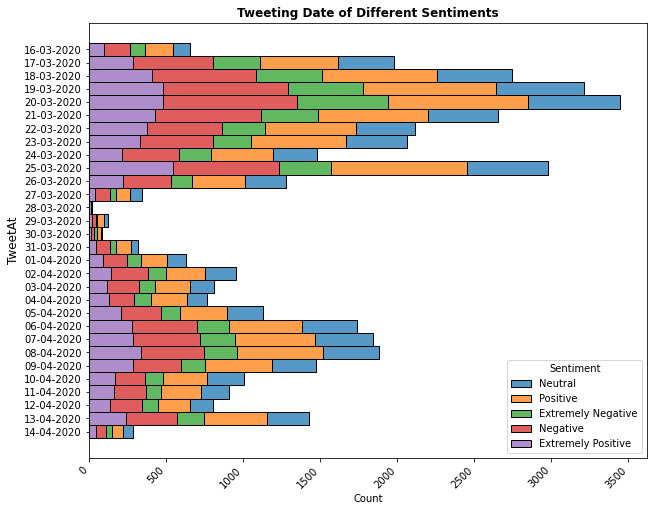

In [35]:
# Plot No- 9
# Plotting Tweet date with different sentiments
plt.figure(figsize=(10,8))
sns.histplot(data=tweet_df, y= "TweetAt", hue="Sentiment", multiple="stack")
plt.xticks(rotation=45, ha='right')
plt.title("Tweeting Date of Different Sentiments", fontweight='bold')
plt.ylabel("TweetAt",fontsize = 12)
plt.show()

*  The above plot shows the distribution of different sentiments on the basis of tweeting date (TweetAt - column).
*  Here it can be analysied that date on 20-03-2020, when maximum tweet took place showing the maximum sentiment types. Among all the sentiments, positive sentiment dominates the most followed by the negative in second place. 
*  Least tweeting date is 28-03-2020, according to plot, where the number of sentiments is also very less in compare to other dates. 
*  The number of extremely positive sentiment tweet can be observed on 25-03-2020. 
*  In same way maximum neutral sentiment tweeted on 20-03-2020. 
*  Extremely positive sentiment tweeted most on 25-03-2020 whereas extremely negative sentiment tweeted most on 20-03-2020. 
*  By seeing all the insight, it can be sensed that this period on 30 days or 1 month, most number of tweets can been seen in the month of March in compare to April month for year 2020. 
*  This period is also important because from the month of March globally the number COVID-19 cases started, which triggered many people.     

### **Punctuations Available in Sentiments**

In [36]:
# Creating the corpus from the sentiment & text column and appending them
def create_corpus(target):
    corpus=[]
    
    for x in tt_df[tt_df['Sentiment']==target ]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [37]:
# Importing the required library
from collections import defaultdict

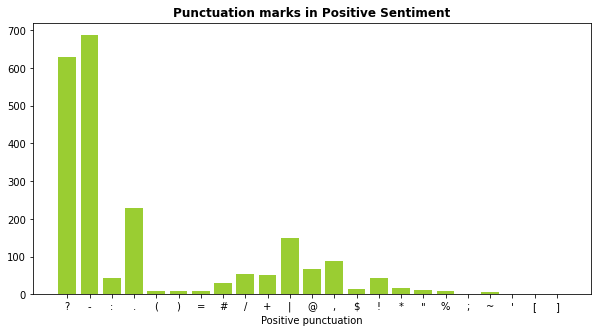

In [38]:
# Creating the collection for each sentiment having different punctuation marks for "Positive Sentiment" 
corpus= create_corpus("Positive")

dic= defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())

# Plot No - 10
# Plotting the required dataset 
plt.figure(figsize=(10,5))
plt.bar(x,y,color='yellowgreen')
plt.xlabel('Positive punctuation')
plt.title('Punctuation marks in Positive Sentiment',fontweight ='bold')
plt.show()

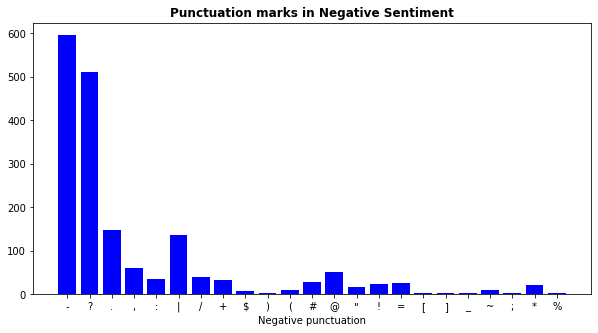

In [39]:
# Creating the collection for each sentiment having different punctuation marks for "Negative Sentiment" 
corpus=create_corpus("Negative")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
                
x,y=zip(*dic.items())

# Plot No - 11
# Plotting the required dataset 
plt.figure(figsize=(10,5))
plt.bar(x,y, color='blue')
plt.xlabel('Negative punctuation')
plt.title('Punctuation marks in Negative Sentiment',fontweight ='bold')
plt.show()

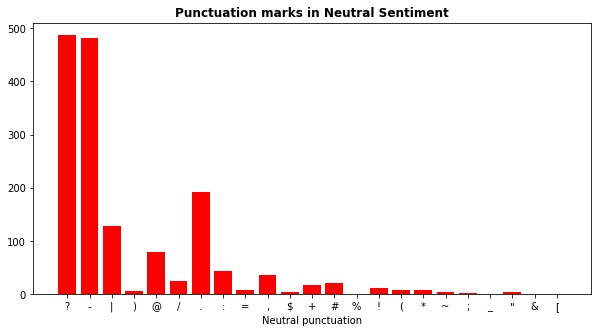

In [40]:
# Creating the collection for each sentiment having different punctuation marks for "Neutral Sentiment" 
corpus=create_corpus("Neutral")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())

# Plot No - 12
# Plotting the required dataset 
plt.figure(figsize=(10,5))
plt.bar(x,y,color='red')
plt.xlabel('Neutral punctuation')
plt.title('Punctuation marks in Neutral Sentiment',fontweight ='bold')
plt.show()

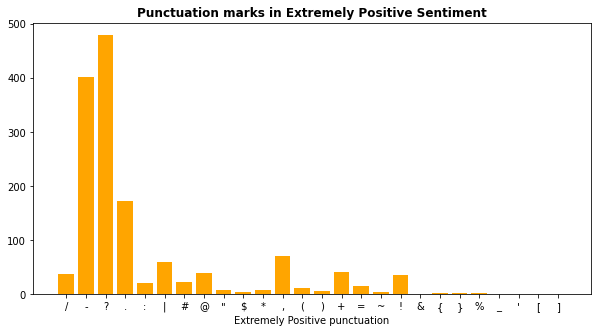

In [41]:
# Creating the collection for each sentiment having different punctuation marks for "Extremely Positive Sentiment" 
corpus=create_corpus("Extremely Positive")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())

# Plot No - 13
# Plotting the required dataset 
plt.figure(figsize=(10,5))
plt.bar(x,y,color='orange')
plt.xlabel('Extremely Positive punctuation')
plt.title('Punctuation marks in Extremely Positive Sentiment',fontweight ='bold')
plt.show()

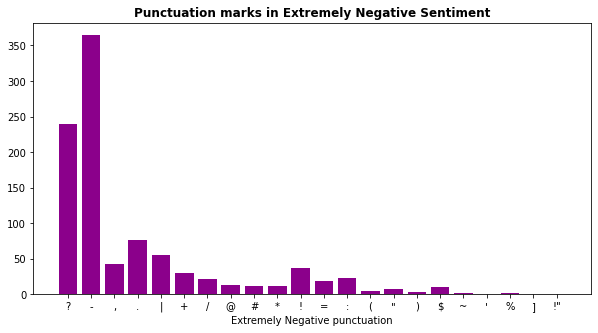

In [42]:
# Creating the collection for each sentiment having different punctuation marks for "Extremely Negative Sentiment" 
corpus=create_corpus("Extremely Negative")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
       
x,y=zip(*dic.items())

# Plot No - 14
# Plotting the required dataset 
plt.figure(figsize=(10,5))
plt.bar(x,y,color='darkmagenta')
plt.xlabel('Extremely Negative punctuation')
plt.title('Punctuation marks in Extremely Negative Sentiment',fontweight ='bold')
plt.show()

### **Mentions present in Tweets** 

Text(0.5, 1.0, 'Top 10 Mentions Present in Tweets')

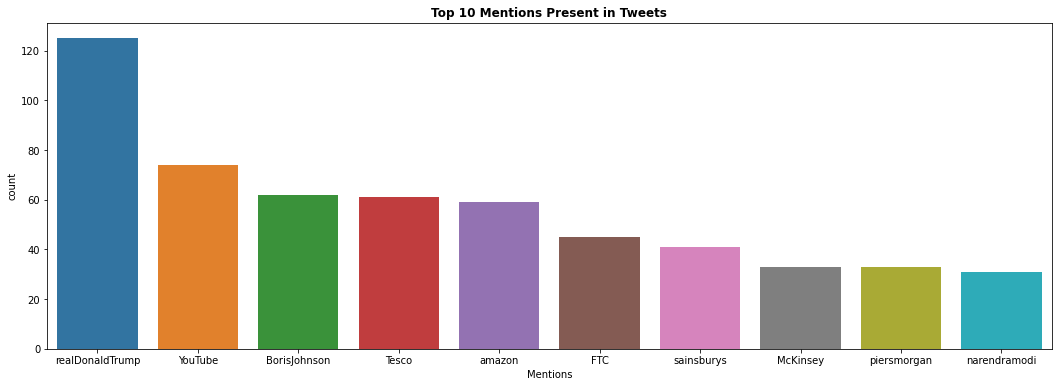

In [43]:
# Finding the different mentions present in tweets with having mentions using @ 
def mentions(text):
    line=re.findall(r'(?<=@)\w+',text)
    return " ".join(line)
tt_df['mentions']=tt_df['text'].apply(lambda x:mentions(x))

temp=tt_df['mentions'].value_counts()[:][1:11]
temp =temp.to_frame().reset_index().rename(columns={'index':'Mentions','mentions':'count'})

# Plot No - 15
# Ploting the bar plot 
sns.barplot(x="Mentions",y="count", data = temp)
plt.title("Top 10 Mentions Present in Tweets", fontweight='bold')

In [44]:
# Importing the required library 
import plotly.express as px

In [45]:
# Finding top 10 mentions in the tweet
b = tt_df['mentions'].value_counts()[:][1:11].index.tolist()
a = tt_df['mentions'].value_counts()[:][1:11].tolist()
row = pd.DataFrame({'scenario' : []})
row["scenario"] = b
row["Percentage"] = a

# Plot No - 16
# Plotting the treemap for different mentions 
fig = px.treemap(row, path= ["scenario"], values="Percentage",title='<b>Tree of Mentions<b>',width=1200, height=600)
#fig.update_layout(margin = dict(t=25, l=10, r=10, b=10))
fig.show()

## **D. OriginalTweet Length**

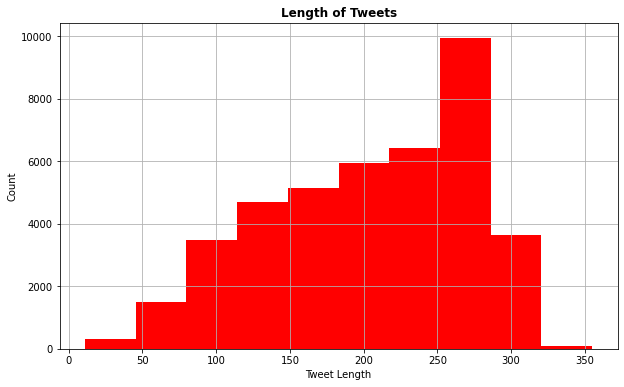

In [46]:
# Plot No - 17
plt.figure(figsize=(10,6))
plt.grid()
plt.hist(tweet_df['OriginalTweet'].str.len(), color='red')
plt.ylabel('Count')
plt.xlabel('Tweet Length')
plt.title('Length of Tweets', fontweight='bold')
plt.show()

### **Relation between OriginalTweet and TweetAt Column**

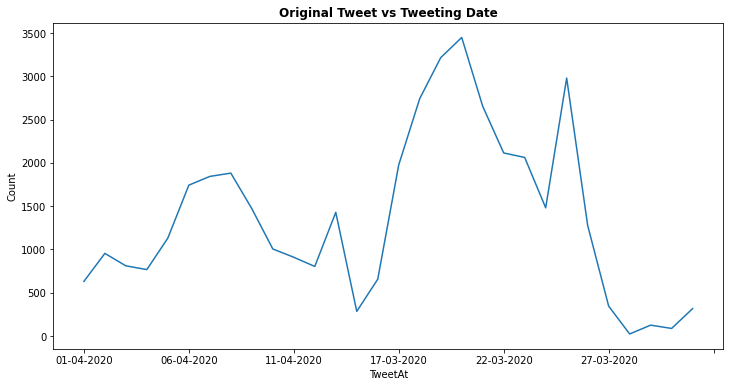

In [47]:
# Plot No - 18
plt.figure(figsize=(12,6))
grp_tweetAt=tweet_df.groupby('TweetAt').count()['OriginalTweet'].plot()
plt.ylabel('Count')
plt.title('Original Tweet vs Tweeting Date', fontweight='bold')
plt.show()

# **4.  Text Preprocessing Steps**

**Short Overview:** The preprocessing of the text data is an essential step as it makes the raw text ready for mining.

*  The objective of this step is to clean noise those are less relevant to find 
the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.
*  As mentioned earlier, the tweets contain lots of twitter handles (@user). We will remove all these twitter handles from the data as they don’t convey much information.
* We are having twitter links in the data which are not useful for our Model. It will make our data noisy.
* As discussed, punctuations, numbers and special characters do not help much. It is better to remove them from the text just as we removed the twitter handles,links and hashtags.
* Stop words are those words in natural language that have a very little meaning, such as "is", "an", "the", etc.To remove stop words from a sentence, you can divide your text into words and then remove the word if it exits in the list of stop words provided by NLTK.
* Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “ed”, “s” etc) from a word. For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.
* In tokenization we convert group of sentence into token . It is also called text segmentation or lexical analysis. It is basically splitting data into small chunk of words. Tokenization in python can be done by python NLTK library’s word_tokenize() function.

## **Text Cleaning**

In [55]:
twt_df = tweet_df.copy()
# twt_df['OriginalTweet']

**a)  Remove @person character**

In [56]:
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

**b)  Removing url, http, etc.**

In [57]:
# create new column with removed @user
twt_df['Clean_tweet'] = np.vectorize(remove_pattern)(twt_df['OriginalTweet'], '@[\w]*')
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,https://t.co/iFz9FAn2Pa and https://t.co/xX...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."


In [58]:
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
twt_df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,As news of the regionÂs first confirmed COVID...
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,Cashier at grocery store was sharing his insig...
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral,Was at the supermarket today. Didn't buy toile...
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive,Due to COVID-19 our retail store and classroom...
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative,"For corona prevention,we should stop to buy th..."


**c)  Remove  punctions, words wich are not formed letters**

In [59]:
# remove special characters, numbers, punctuations
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].str.replace('[^a-zA-Z#]+',' ')
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the #COVI...


**d)  Removing short words**

In [ ]:
# # remove short words
# twt_df['Clean_tweet'] = twt_df['Clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
# twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk your neighbours family exchange ph...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock not the only one which empty PLEASE...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket during the #COVID outbreak N...


In [60]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [62]:
len(sw)

179

In [63]:
## Function to remove stopwords

def remove_stopwords(text):
  ''' function to remove stopwords'''
  ## make text smallcase and then remove stopwords
  text = [word.lower() for word in text.split() if word.lower() not in sw]

  # joining the list of words with space separator 
  return " ".join(text)

In [64]:
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].apply(remove_stopwords)

In [65]:
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empty please panic enough food ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket #covid outbreak paranoid ...


**e)  Create new variable tokenized tweet**

In [66]:
# create new variable tokenized tweet 
tokenized_tweet = twt_df['Clean_tweet'].apply(lambda x: x.split())
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empty please panic enough food ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket #covid outbreak paranoid ...


**f)  Converting text data to lowercase**

In [67]:
# Creating lower case 
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

**g)  Stemming**

In [ ]:
# # Importing Stemming library
# from nltk.stem.porter import *
# stemmer = PorterStemmer()

In [68]:
#Importing libraries to perform stemming operation
from nltk.stem.snowball import SnowballStemmer

In [69]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [70]:
twt_df['Clean_tweet']= twt_df['Clean_tweet'].apply(stemming)
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworth give elder dis...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empti pleas panic enough food e...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,readi go supermarket #covid outbreak paranoid ...


In [ ]:
# # apply stemmer for tokenized_tweet
# tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
# twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk your neighbours family exchange ph...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock not the only one which empty please...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket during the #covid outbreak n...


**h)  Tokenization**

In [ ]:
# # join tokens into one sentence
# for i in range(len(tokenized_tweet)):
#     tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
# # change df['Clean_tweet'] to tokenized_tweet

In [ ]:
# twt_df['Clean_tweet']  = tokenized_tweet
# twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advic talk your neighbour famili exchang phone...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronaviru australia woolworth give elderli di...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock not the onli one which empti pleas ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,readi supermarket dure the #covid outbreak not...


# **5.  Story Generation from Tweets** 

We might think what will be the more different insights we can get it from the Tweets, hence some of the question can come- 

* What will be the most common words in the tweets ?
* What is the importance of hashtags in different sentimental tweets ?
* Most trending hashtag in the tweets ?
* Is their any difference in the trending hashtags of positive and negative tweets ? 
* How wordclouds can be important to our tweets ?  


## **Importance of Hashtags on Tweet Sentiments** 

In [72]:
# Using function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

In [73]:
# Extracting hashtags from different tweets as per sentiments
Htg_Extremely_Positive = hashtag_extract(twt_df['OriginalTweet'][twt_df['Sentiment'] == 'Extremely Positive'])
Htg_Positive = hashtag_extract(twt_df['OriginalTweet'][twt_df['Sentiment'] == 'Positive'])
Htg_Neutral = hashtag_extract(twt_df['OriginalTweet'][twt_df['Sentiment'] == 'Neutral'])
Htg_Negative = hashtag_extract(twt_df['OriginalTweet'][twt_df['Sentiment'] == 'Negative'])
Htg_Extremely_Negative = hashtag_extract(twt_df['OriginalTweet'][twt_df['Sentiment'] == 'Extremely Negative'])

In [74]:
# Unnesting list
Htg_Extremely_Positive = sum(Htg_Extremely_Positive, [])
Htg_Positive = sum(Htg_Positive, [])
Htg_Neutral = sum(Htg_Neutral, [])
Htg_Negative = sum(Htg_Negative,[])
Htg_Extremely_Negative = sum(Htg_Extremely_Negative,[])

In [75]:
# Printing the result
print("Hashtag Extremely Positive Words : ", Htg_Extremely_Positive)
print("Hashtag Positive Words : ", Htg_Positive)
print("Hashtag Neutral Words : ", Htg_Neutral)
print("Hashtag Negative Words : ", Htg_Negative)
print("Hashtag Extremely Negative Words : ", Htg_Extremely_Negative)

Hashtag Extremely Positive Words :  ['horningsea', 'COVID2019', 'Trials', 'Monthly', 'Yearly', 'Prices', 'Subscriptions', 'bestiptv', 'iptv', 'Service', 'Iptv', 'iptvdeals', 'Cheap', 'ipTV', 'Football', 'HD', 'Movies', 'Adult', 'Cinema', 'hotmovies', 'iptvnew', 'iptv2020', 'Adult', 'COVID2019', 'Trials', 'Monthly', 'Yearly', 'Prices', 'Subscriptions', 'bestiptv', 'iptv', 'Service', 'Iptv', 'iptvdeals', 'Cheap', 'ipTV', 'Football', 'HD', 'Movies', 'Adult', 'Cinema', 'hotmovies', 'ipTv', '18Movies', 'consumer', 'covid19', 'tracker', 'BreakingNews', 'Breaking', 'Coronavirus', 'CoronavirusOutbreak', 'COVID19', 'COVID', 'COVID_19', 'COVID2019', 'Collapse', 'CoronavirusOutbreak', 'coronavirus', 'COVID2019', 'jlmco', 'jlmcobrand', 'coronapocolypse', 'coronavirus', 'CoronavirusOutbreak', 'COVID19', 'shoponline', 'coronavirus', 'COVID19', 'peoplearelosingtheirminds', 'StopTheMadness', 'stoppanicbuying', 'coronavirus', 'StopPanicBuying', 'BeKind', 'mufc', 'MUFC_Family', 'Malaysia2020', 'Malaysia

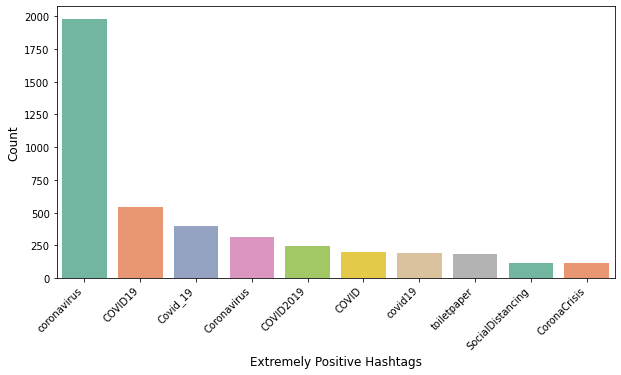

In [76]:
# Making frequency distribution top 10 Extremely Positive hashtags
a = nltk.FreqDist(Htg_Extremely_Positive)

#Creating dataframe 
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})
d = d.nlargest(columns = 'Count', n = 10)

# Plot No- 19
# Plotting the result 
plt.figure(figsize = (10,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count',palette= 'Set2')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Extremely Positive Hashtags",fontsize = 12)
plt.show()

* ### The above bar plot shows the top 10 most occuring "Hashtags" for extremely positive sentiment tweets. 
* ### **"Coronavirus"** trends the most among the other hashtags and its count value ranged between 1750 and 2000. 

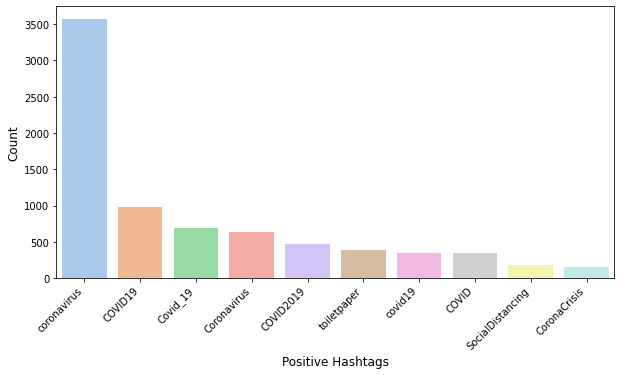

In [77]:
# Making frequency distribution top 10 Positive hashtags
b = nltk.FreqDist(Htg_Positive)

#Creating dataframe 
d = pd.DataFrame({'Hashtag': list(b.keys()),
                  'Count' : list(b.values())})
d = d.nlargest(columns = 'Count', n = 10)

# Plot No- 20
# Plotting the result
plt.figure(figsize = (10,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count',palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Positive Hashtags",fontsize = 12)
plt.show()

* ### The above bar plot shows the top 10 most occuring "Hashtags" for positive sentiment tweets. 
* ### **"Coronavirus"** trends the most among the other hashtags and its count value reached above 3500 and more. 

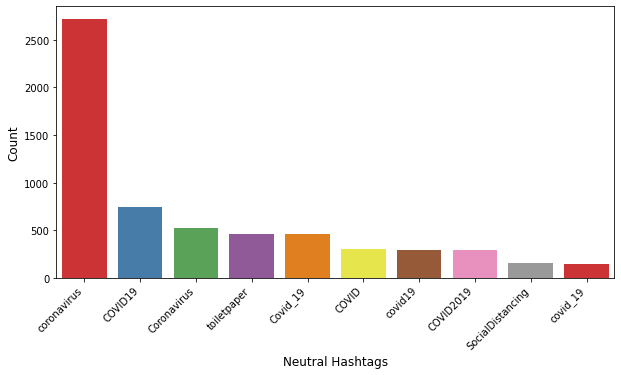

In [78]:
# making frequency distribution top 10 Neutral hashtags
c = nltk.FreqDist(Htg_Neutral)

#Creating dataframe 
d = pd.DataFrame({'Hashtag': list(c.keys()),
                  'Count' : list(c.values())})
d = d.nlargest(columns = 'Count', n = 10)

# Plot No- 21
# Plotting the result
plt.figure(figsize = (10,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count', palette='Set1')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Neutral Hashtags",fontsize = 12)
plt.show()

* ### The above bar plot shows the top 10 most occuring "Hashtags" for neutral sentiment tweets. 
* ### **"Coronavirus"** trends the most among the other hashtags and its count value reached above 2500 and more. 

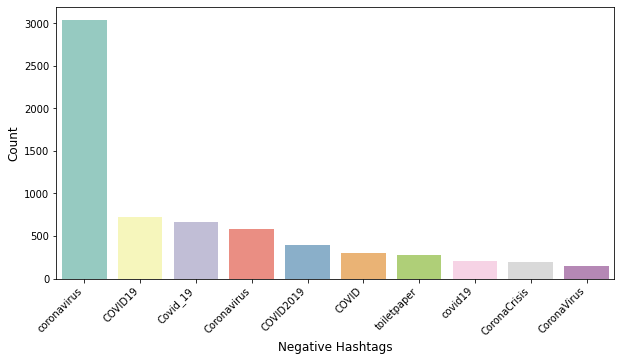

In [79]:
# making frequency distribution top 10 Negative hashtags
e = nltk.FreqDist(Htg_Negative)

#Creating dataframe 
d = pd.DataFrame({'Hashtag': list(e.keys()),
                  'Count' : list(e.values())})
d = d.nlargest(columns = 'Count', n = 10)

# Plot No- 22
# Plotting the result
plt.figure(figsize = (10,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count', palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Negative Hashtags",fontsize = 12)
plt.show()

* ### The above bar plot shows the top 10 most occuring "Hashtags" for negative sentiment tweets. 
* ### **"Coronavirus"** trends the most among the other hashtags and its count value reached most at around 3000. 

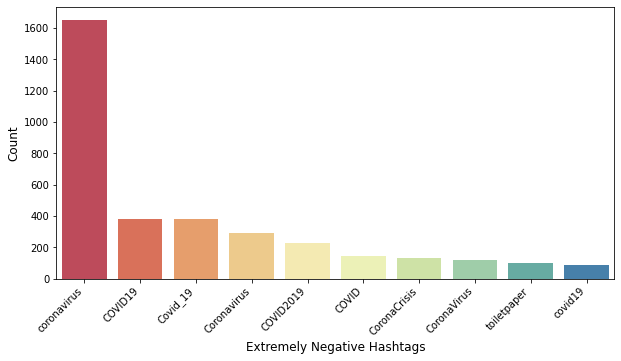

In [80]:
# making frequency distribution top 10 Extremely Negative hashtags
f = nltk.FreqDist(Htg_Extremely_Negative)

#Creating dataframe 
d = pd.DataFrame({'Hashtag': list(f.keys()),
                  'Count' : list(f.values())})
d = d.nlargest(columns = 'Count', n = 10)

# Plot No- 23
# Plotting the result
plt.figure(figsize = (10,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count', palette='Spectral')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Extremely Negative Hashtags",fontsize = 12)
plt.show()

* ### The above bar plot shows the top 10 most occuring "Hashtags" for extremely negative sentiment tweets. 
* ### **"Coronavirus"** trends the most among the other hashtags and its count value reached most at around 1600.  

# **6.  Word Cloud**

In [81]:
# Importing the required libraries for Word Cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import os
from os import path

### Here we are representing the most occuring words in our dataset in common first. Further word cloud of each sentiments has also showen, which help us to analyse which words are used frequently for each of the sentiments, respectively. 



In [82]:
# Creating new dataframe
cld_df = twt_df[['Clean_tweet', 'Sentiment']]
cld_df.head(3)

,Clean_tweet,Sentiment
0,,Neutral
1,advic talk neighbour famili exchang phone numb...,Positive
2,coronavirus australia woolworth give elder dis...,Positive


In [83]:
# Encoding the sentiments from 0 to 4 i.e., from extremely positive to extremely negative
sentiment_map = {"Extremely Negative":4, "Negative":3, "Neutral":2, "Positive":1,"Extremely Positive":0}
cld_df['Sentiment'] = cld_df['Sentiment'].map(sentiment_map)

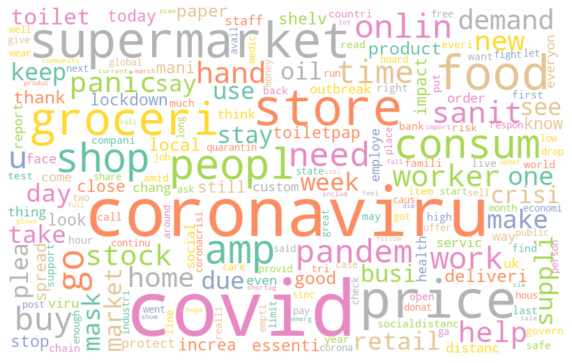

In [84]:
# Plot No- 24
# Most occuring words of all in Tweets
all_words = ' '.join([text for text in cld_df.Clean_tweet])
wordcloud = WordCloud(background_color = "white", width=800, height=500, random_state=21, max_font_size=110, stopwords = set(STOPWORDS), colormap='Set2', collocations=False,).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

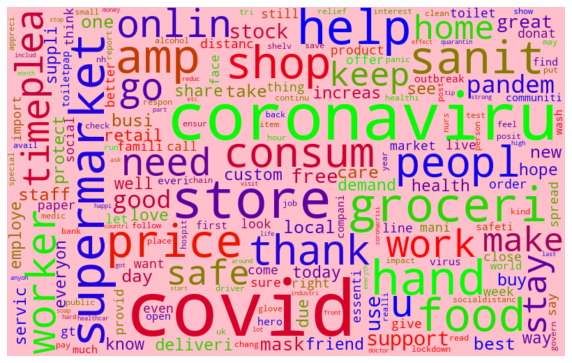

In [85]:
# Plot No- 25
# Most common occuring words in "Extremely Positive" sentiment
Extremely_Positive =' '.join([text for text in cld_df['Clean_tweet'][cld_df['Sentiment'] == 0]])

wordcloud = WordCloud(background_color = "pink", width=800, height=500, random_state=21, max_font_size=110, stopwords = set(STOPWORDS),colormap='brg', collocations=False).generate(Extremely_Positive)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

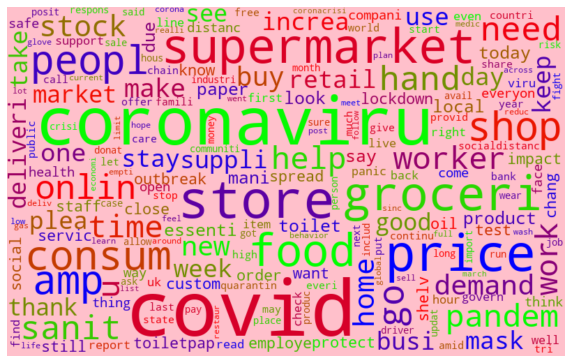

In [86]:
# Plot No- 26
# Most common occuring words in "Positive" sentiment
Positive =' '.join([text for text in cld_df['Clean_tweet'][cld_df['Sentiment'] == 1]])

wordcloud = WordCloud(background_color = "pink", width=800, height=500, random_state=21, max_font_size=110, stopwords = set(STOPWORDS),colormap='brg',collocations=False).generate(Positive)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

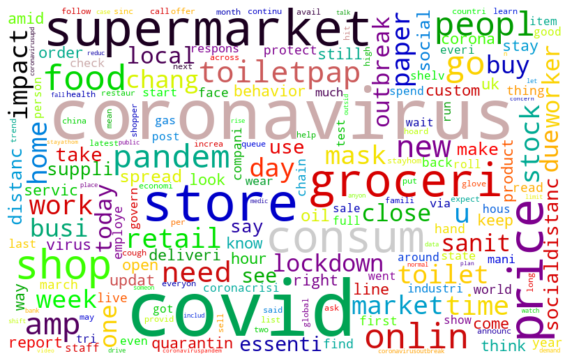

In [87]:
# Plot No- 27
# Most common occuring words in "Neutral" sentiment
Neutral =' '.join([text for text in cld_df['Clean_tweet'][cld_df['Sentiment'] == 2]])

wordcloud = WordCloud(background_color = "white", width=800, height=500, random_state=21, max_font_size=110, stopwords = set(STOPWORDS),colormap='nipy_spectral',collocations=False).generate(Neutral)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

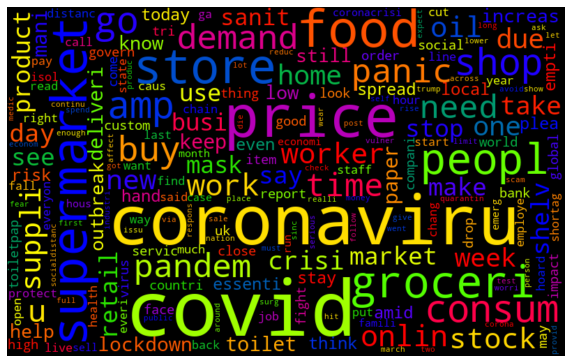

In [88]:
# Plot No- 28
# Most common occuring words in "Negative" sentiment
Negative =' '.join([text for text in cld_df['Clean_tweet'][cld_df['Sentiment'] == 3]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, stopwords = set(STOPWORDS),colormap='prism',collocations=False).generate(Negative)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

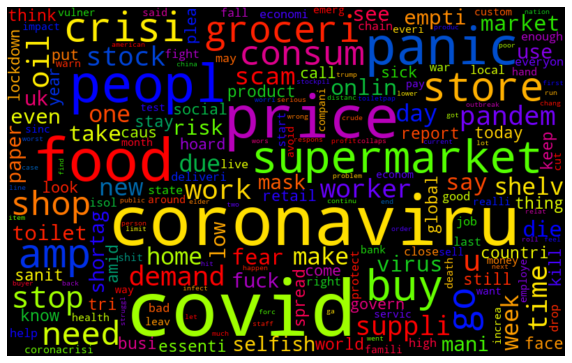

In [89]:
# Plot No- 29
# Most common occuring words in "Extremely Negative" sentiment
Extremely_Negative =' '.join([text for text in cld_df['Clean_tweet'][cld_df['Sentiment'] == 4]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, stopwords = set(STOPWORDS),colormap='prism',collocations=False).generate(Extremely_Negative)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# **7.  Required Features**

In [90]:
# Creating new dataframe
twt1_df = twt_df[['Clean_tweet', 'Sentiment']]
twt1_df.head(10)

,Clean_tweet,Sentiment
0,,Neutral
1,advic talk neighbour famili exchang phone numb...,Positive
2,coronavirus australia woolworth give elder dis...,Positive
3,food stock one empti pleas panic enough food e...,Positive
4,readi go supermarket #covid outbreak paranoid ...,Extremely Negative
5,news region first confirm covid case came sull...,Positive
6,cashier groceri store share insight #covid pro...,Positive
7,supermarket today buy toilet paper #rebel #toi...,Neutral
8,due covid retail store classroom atlanta open ...,Positive
9,corona prevent stop buy thing cash use onlin p...,Negative


**Most common words**

In [91]:
# Most Common words
from collections import Counter
cnt = Counter()
for text in twt1_df.Clean_tweet.values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('#coronavirus', 14155),
 ('#covid', 10673),
 ('covid', 10574),
 ('price', 8911),
 ('store', 8207),
 ('supermarket', 7297),
 ('food', 6996),
 ('groceri', 6496),
 ('peopl', 5594),
 ('amp', 5115)]

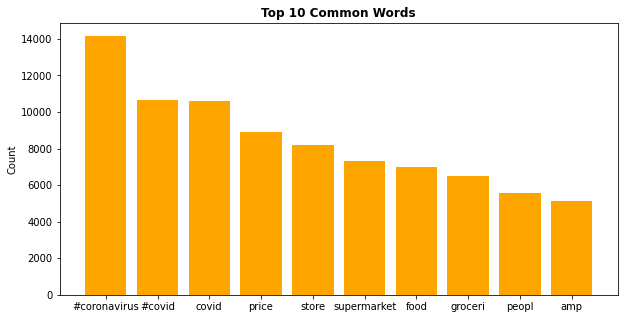

In [92]:
# Plot No -30
# Creating top 10 common words used in the tweets
com= sorted(cnt.most_common(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*com)
plt.figure(figsize = (10,5))
plt.bar(x,y, color='orange')
plt.title('Top 10 Common Words', fontweight='bold')
plt.ylabel('Count')
plt.show()

# **8.  Feature Engineering**

### **Encoding the Sentiment**

In [93]:
# Encoding the sentiments from -1, 0 and 1 i.e., from extremely positive to extremely negative
sentiment_map = {"Extremely Negative":-1, "Negative":-1, "Neutral":0, "Positive":1,"Extremely Positive":1}
twt1_df['Sentiment'] = twt1_df['Sentiment'].map(sentiment_map)

In [94]:
# Checking the updated dataframe
twt1_df.head()

,Clean_tweet,Sentiment
0,,0
1,advic talk neighbour famili exchang phone numb...,1
2,coronavirus australia woolworth give elder dis...,1
3,food stock one empti pleas panic enough food e...,1
4,readi go supermarket #covid outbreak paranoid ...,-1


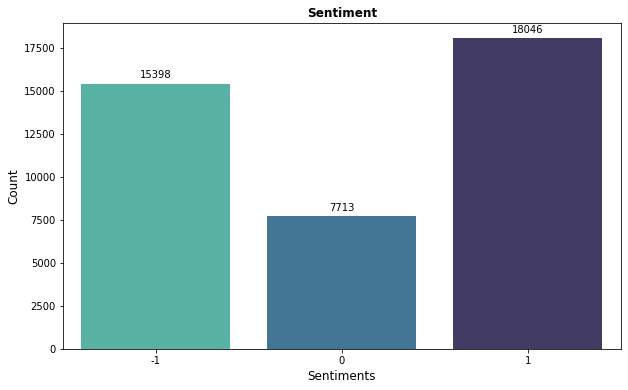

In [95]:
# Plot No- 31
# Plotting the Encoded Sentiments value as countplot 
plt.figure(figsize=(10,6))
splot = sns.countplot(x='Sentiment', data=twt1_df,palette="mako_r")
# adding annotation
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0,9), textcoords = 'offset points')
plt.title("Sentiment", fontweight='bold')
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Sentiments",fontsize = 12)
plt.show()

## **Feature Extraction Cleaned Tweets**

Multiclass sentiment

In [96]:
# Importing libraries 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve
from sklearn.model_selection import train_test_split

In [97]:
# Checking information 
twt1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Clean_tweet  41157 non-null  object
 1   Sentiment    41157 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 643.2+ KB


In [98]:
# Checking shape
twt1_df.shape

(41157, 2)

In [105]:
# Downloading stopwords library
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [106]:
# Importing stopwards
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [107]:
# Applying stopwards to Clean_tweet column
twt1_df['Clean_tweet'].apply(lambda x: [item for item in x if item not in stop])

0                                                       []
1        [v, c,  , l, k,  , n, e, g, h, b, u, r,  , f, ...
2        [c, r, n, v, r, u,  , u, r, l,  , w, l, w, r, ...
3        [f,  , c, k,  , n, e,  , e, p,  , p, l, e,  , ...
4        [r, e,  , g,  , u, p, e, r, r, k, e,  , #, c, ...
                               ...                        
41152    [r, l, n,  , p, l,  , f, f, e, r,  , c, k,  , ...
41153    [r, e, p, n,  , c, p, l, n,  , p, r, v,  , c, ...
41154    [k, n, w,  , g, e,  , u, g, h,  , r, n,  , l, ...
41155    [w, r, n, g,  , e, l, l,  , h, n,  , n,  , r, ...
41156    [w, e, l, l,  , n, e, w,  , u, e,  , r, f,  , ...
Name: Clean_tweet, Length: 41157, dtype: object

In [99]:
# Checking null values
twt1_df.isnull().sum()

Clean_tweet    0
Sentiment      0
dtype: int64

In [100]:
# Null values showing false 
pd.isnull(twt1_df["Sentiment"])

0        False
1        False
2        False
3        False
4        False
         ...  
41152    False
41153    False
41154    False
41155    False
41156    False
Name: Sentiment, Length: 41157, dtype: bool

In [101]:
# Looking into dataframe
twt1_df.head(3)

,Clean_tweet,Sentiment
0,,0
1,advic talk neighbour famili exchang phone numb...,1
2,coronavirus australia woolworth give elder dis...,1


### Hence, it can be seen there are no nan/null value which means our dataset is clean and is ready for being used for model development.

In [111]:
# remove short words
twt1_df['Clean_tweet'] = twt_df['Clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
twt1_df.head()

,Clean_tweet,Sentiment
0,,0
1,advic talk neighbour famili exchang phone numb...,1
2,coronavirus australia woolworth give elder dis...,1
3,food stock one empti pleas panic enough food e...,1
4,readi supermarket #covid outbreak paranoid foo...,-1


### **Train-Test Split**

In [108]:
#stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
train,valid = train_test_split(twt1_df,test_size = 0.2,random_state=0,stratify = twt1_df.Sentiment.values)

#Printing the result 
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (32925, 2)
valid shape :  (8232, 2)


# **9.  Counter Vectorizer For Multi Class Classification**

In [114]:
# Importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [115]:
# Applying stopwards and CountVectorizer for NLP
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

# Fitting using transform  
X_train = vectorizer.fit_transform(train.Clean_tweet.values)
X_valid = vectorizer.transform(valid.Clean_tweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

# Printing the shape of train and test(valid) values
print("X_train.shape : ", X_train.shape)
print("X_valid.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (32925, 27307)
X_valid.shape :  (8232, 27307)
y_train.shape :  (32925,)
y_valid.shape :  (8232,)


# **10.  Application of Models along with its Confusion Matrix**

In [ ]:
# Importing libraries for confusion matrix
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.metrics import f1_score

plt.rcParams["figure.figsize"] = (8,6)
labels = ['Negative', 'Neutral', 'Positive']

## **Model 1: Naive Bayes Classifier for multiclass**

In [ ]:
# Importing library
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

# Fitting the train & test value
naiveByes_clf.fit(X_train,y_train)

MultinomialNB()

In [ ]:
# Predicting the train and test
y_pred_NB_valid = naiveByes_clf.predict(X_valid)
y_pred_NB_train = naiveByes_clf.predict(X_train)

# Checking accuracy
NB_accuracy = accuracy_score(y_valid,y_pred_NB_valid)

# Printing the result
print("Train accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(y_pred_NB_valid,y_valid))

Train accuracy Score    :  0.7800151860288534
Validation accuracy Score :  0.6845238095238095
              precision    recall  f1-score   support

          -1       0.76      0.68      0.72      3428
           0       0.26      0.70      0.38       571
           1       0.80      0.69      0.74      4233

    accuracy                           0.68      8232
   macro avg       0.61      0.69      0.61      8232
weighted avg       0.75      0.68      0.71      8232



[[10213   264  1841]
 [ 1250  2900  2020]
 [ 1580   288 12569]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

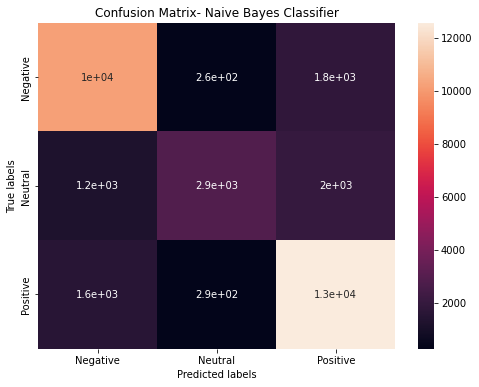

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_train,y_pred_NB_train)
print(cm)

# Plot No- 32
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix- Naive Bayes Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Model Performance
NB_precision = precision_score(y_pred_NB_valid,y_valid, average ='weighted')
NB_recall = recall_score(y_pred_NB_valid,y_valid,average ='weighted')
NB_f1_score = f1_score(y_pred_NB_valid,y_valid,average ='weighted')
print(NB_precision, NB_recall, NB_f1_score)

0.7471440629719345 0.6845238095238095 0.7055684090609173


## **Model 2: Stochastic Gradient Descent-SGD Classifier**

**Hyperparameter tuning** 

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

param_grid ={}

# fitting parameter with Cross Validation
grid_sgd = GridSearchCV(sgd_clf, param_grid, verbose = 3, cv = 5)

grid_sgd.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.802 total time=   0.4s
[CV 2/5] END ..................................., score=0.811 total time=   0.4s
[CV 3/5] END ..................................., score=0.805 total time=   0.4s
[CV 4/5] END ..................................., score=0.803 total time=   0.4s
[CV 5/5] END ..................................., score=0.802 total time=   0.4s


GridSearchCV(cv=5, estimator=SGDClassifier(random_state=0), param_grid={},
             verbose=3)

In [ ]:
y_pred_sgd_valid = grid_sgd.predict(X_valid)
y_pred_sgd_train = grid_sgd.predict(X_train)

sgd_accuracy = accuracy_score(y_valid,y_pred_sgd_valid)

print("Train accuracy Score    : ",grid_sgd.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(y_pred_sgd_valid,y_valid))

Train accuracy Score    :  0.9167805618830676
Validation accuracy Score :  0.80988824101069
              precision    recall  f1-score   support

          -1       0.81      0.83      0.82      3030
           0       0.72      0.70      0.71      1577
           1       0.85      0.84      0.84      3625

    accuracy                           0.81      8232
   macro avg       0.79      0.79      0.79      8232
weighted avg       0.81      0.81      0.81      8232



[[11358   338   622]
 [  347  5355   468]
 [  585   380 13472]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

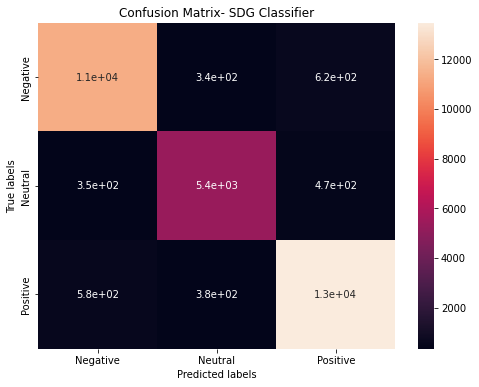

In [ ]:
# Confusion Matrix
cm1 = confusion_matrix(y_train, y_pred_sgd_train)
print(cm1)

# Plot No- 33
ax= plt.subplot()
sns.heatmap(cm1, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix- SDG Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Model Performance 
sgd_precision = precision_score(y_pred_sgd_valid,y_valid, average ='weighted')
sgd_recall = recall_score(y_pred_sgd_valid,y_valid,average ='weighted')
sgd_f1_score = f1_score(y_pred_sgd_valid,y_valid,average ='weighted')
print(sgd_precision, sgd_recall, sgd_f1_score)

0.8095581323654848 0.80988824101069 0.8096849523322988


## **Model 3: Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

**Hyperparameter tuning**

In [ ]:
# creating param dict to check diffirent value of parameter
grid_values = {'n_estimators':[60,80,100],
               'max_depth':[100,200,300]}
               
#fit the parameter with Cross Validation 
rf_clf = GridSearchCV(RandomForestClassifier(), param_grid= grid_values,verbose= 3, cv=5, scoring ='accuracy')
#training model
rf_clf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....max_depth=100, n_estimators=60;, score=0.711 total time=  22.3s
[CV 2/5] END ....max_depth=100, n_estimators=60;, score=0.705 total time=  23.2s
[CV 3/5] END ....max_depth=100, n_estimators=60;, score=0.710 total time=  22.8s
[CV 4/5] END ....max_depth=100, n_estimators=60;, score=0.700 total time=  23.9s
[CV 5/5] END ....max_depth=100, n_estimators=60;, score=0.706 total time=  22.2s
[CV 1/5] END ....max_depth=100, n_estimators=80;, score=0.708 total time=  29.8s
[CV 2/5] END ....max_depth=100, n_estimators=80;, score=0.713 total time=  31.0s
[CV 3/5] END ....max_depth=100, n_estimators=80;, score=0.709 total time=  30.1s
[CV 4/5] END ....max_depth=100, n_estimators=80;, score=0.702 total time=  30.5s
[CV 5/5] END ....max_depth=100, n_estimators=80;, score=0.707 total time=  30.1s
[CV 1/5] END ...max_depth=100, n_estimators=100;, score=0.711 total time=  40.0s
[CV 2/5] END ...max_depth=100, n_estimators=100;,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [100, 200, 300],
                         'n_estimators': [60, 80, 100]},
             scoring='accuracy', verbose=3)

In [ ]:
print(rf_clf.best_params_)
print(rf_clf.best_estimator_)

{'max_depth': 300, 'n_estimators': 100}
RandomForestClassifier(max_depth=300)


In [ ]:
#prediction
y_pred_rf_train = rf_clf.predict(X_train)
y_pred_rf_valid = rf_clf.predict(X_valid)

rf_accuracy = accuracy_score(y_valid, y_pred_rf_valid)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(y_pred_rf_valid,y_valid))

Training accuracy Score    :  0.9911313591495824
Validation accuracy Score :  0.7627551020408163
              precision    recall  f1-score   support

          -1       0.74      0.80      0.77      2880
           0       0.67      0.67      0.67      1557
           1       0.82      0.78      0.80      3795

    accuracy                           0.76      8232
   macro avg       0.75      0.75      0.75      8232
weighted avg       0.76      0.76      0.76      8232



[[12193   122     3]
 [    2  6167     1]
 [    4   160 14273]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

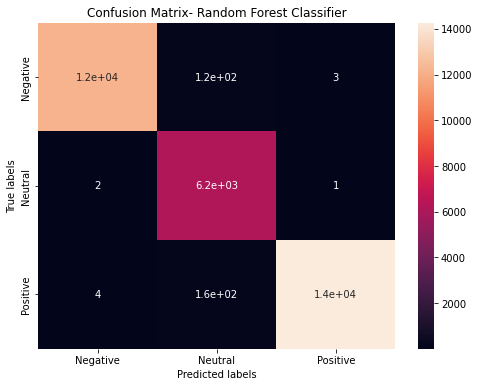

In [ ]:
# Confusion Matrix
cm2 = confusion_matrix(y_train, y_pred_rf_train)
print(cm2)


# Plot No- 34
ax= plt.subplot()
sns.heatmap(cm2, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix- Random Forest Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Model Performance 
rf_precision = precision_score(y_pred_rf_valid,y_valid, average ='weighted')
rf_recall = recall_score(y_pred_rf_valid,y_valid,average ='weighted')
rf_f1_score = f1_score(y_pred_rf_valid,y_valid,average ='weighted')
print(rf_precision, rf_recall, rf_f1_score)

0.7642809723698005 0.7627551020408163 0.7629804811680441


In [ ]:
#from sklearn.ensemble import RandomForestClassifier

#rf_clf = RandomForestClassifier()

#rf_clf.fit(X_train,y_train)

#rf_prediction = rf_clf.predict(X_valid)
#rf_accuracy = accuracy_score(y_valid,rf_prediction)

#print("Train accuracy Score    : ",rf_clf.score(X_train,y_train))
#print("Validation accuracy Score : ",rf_accuracy )
#print(classification_report(rf_prediction,y_valid))

Train accuracy Score    :  0.9963553056336562
Validation accuracy Score :  0.7498380304502753
              precision    recall  f1-score   support

          -1       0.73      0.77      0.75      4395
           0       0.66      0.68      0.67      2245
           1       0.80      0.76      0.78      5708

    accuracy                           0.75     12348
   macro avg       0.73      0.74      0.73     12348
weighted avg       0.75      0.75      0.75     12348



## **Model 4: Support vector machine**

In [ ]:
#import the packages
from sklearn.svm import SVC

In [ ]:
svc_clf =SVC (kernel ='linear',verbose = 3)
svc_clf.fit(X_train, y_train)

[LibSVM]

SVC(kernel='linear', verbose=3)

In [ ]:
#svc_clf.best_estimator_

SVC(probability=True)

In [ ]:
# Get the predicted classes
y_pred_svc_train = svc_clf.predict(X_train)
y_pred_svc_valid = svc_clf.predict(X_valid)

In [ ]:
svm_accuracy = accuracy_score(y_valid, y_pred_svc_valid)
print("Training accuracy Score    : ",svc_clf.score(X_train,y_train))
print("Validation accuracy Score : ",svm_accuracy )
print(classification_report(y_pred_svc_valid,y_valid))

Training accuracy Score    :  0.9528321943811693
Validation accuracy Score :  0.7915451895043731
              precision    recall  f1-score   support

          -1       0.81      0.79      0.80      3147
           0       0.70      0.69      0.69      1575
           1       0.82      0.84      0.83      3510

    accuracy                           0.79      8232
   macro avg       0.78      0.77      0.77      8232
weighted avg       0.79      0.79      0.79      8232



[[11815   171   332]
 [  235  5706   229]
 [  350   236 13851]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

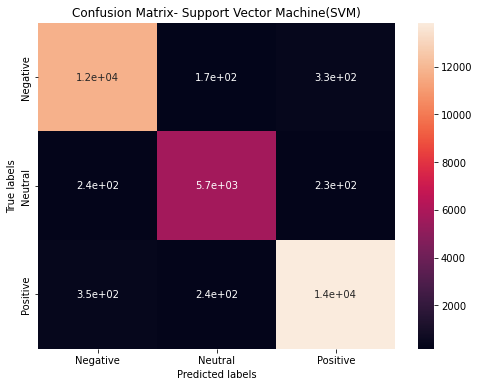

In [ ]:
# Confusion Matrix
cm3 = confusion_matrix(y_train, y_pred_svc_train)
print(cm3)

# Plot No- 35
ax= plt.subplot()
sns.heatmap(cm3, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix- Support Vector Machine(SVM)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Model Performance 
svc_precision = precision_score(y_pred_svc_valid,y_valid, average ='weighted')
svc_recall = recall_score(y_pred_svc_valid,y_valid,average ='weighted')
svc_f1_score = f1_score(y_pred_svc_valid,y_valid,average ='weighted')
print(svc_precision, svc_recall)

0.7910287310617033 0.7915451895043731


In [ ]:
#from sklearn.svm import SVC

#svc = SVC()

#svc.fit(X_train, y_train)

#svc_prediction = svc.predict(X_valid)
#svc_accuracy = accuracy_score(y_valid,svc_prediction)

#print("Train accuracy Score    : ",svc.score(X_train,y_train))
#print("Test accuracy Score : ",svc_accuracy )
#print(classification_report(svc_prediction,y_valid))

Train accuracy Score    :  0.9334851936218679
Test accuracy Score :  0.7738095238095238
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      3693
           1       0.69      0.68      0.69      1575
           2       0.76      0.79      0.78      2964

    accuracy                           0.77      8232
   macro avg       0.76      0.76      0.76      8232
weighted avg       0.77      0.77      0.77      8232



## **Model 5: Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

**Hyperparameter tuning**

In [ ]:
logistic = LogisticRegression()

#set the parmeter
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 300, 500, 1000] }


#fit the parameter with Cross Validation
grid_lr = GridSearchCV(LogisticRegression(), param_grid, n_jobs = -1, verbose = 3, cv = 5)
#training model
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 300, 500,
                               1000],
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [ ]:
print(grid_lr.best_score_)
print(grid_lr.best_params_)

0.793621867881549
{'C': 0.5, 'penalty': 'l2'}


In [ ]:
#prediction
y_pred_lr_train = grid_lr.predict(X_train)
y_pred_lr_valid = grid_lr.predict(X_valid)

lr_accuracy = accuracy_score(y_valid, y_pred_lr_valid)
print("Training accuracy Score    : ",grid_lr.score(X_train,y_train))
print("Validation accuracy Score : ",lr_accuracy )
print(classification_report(y_pred_lr_valid,y_valid))

Training accuracy Score    :  0.9182384206529992
Validation accuracy Score :  0.7956754130223518
              precision    recall  f1-score   support

          -1       0.81      0.81      0.81      3068
           0       0.70      0.68      0.69      1570
           1       0.83      0.83      0.83      3594

    accuracy                           0.80      8232
   macro avg       0.78      0.78      0.78      8232
weighted avg       0.80      0.80      0.80      8232



[[11365   332   621]
 [  347  5377   446]
 [  585   361 13491]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

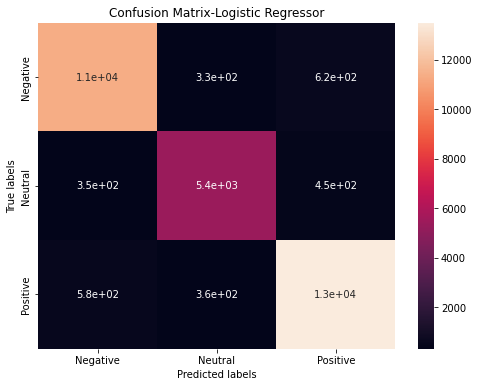

In [ ]:
# Confusion Matrix
cm4 = confusion_matrix(y_train, y_pred_lr_train)
print(cm4)

# Plot No- 36
ax= plt.subplot()
sns.heatmap(cm4, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix-Logistic Regressor')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Model Performance 
lr_precision = precision_score(y_pred_lr_valid,y_valid, average ='weighted')
lr_recall = recall_score(y_pred_lr_valid,y_valid,average ='weighted')
lr_f1_score = f1_score(y_pred_lr_valid,y_valid,average ='weighted')
print(lr_precision, lr_recall, lr_f1_score)

0.7952693859430446 0.7956754130223518 0.7954597874061191


## **Model 6: CatBoost**

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [ ]:
clf2 = CatBoostClassifier()

clf2.fit(X_train, y_train, eval_set=(X_valid, y_valid), verbose=False)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [ ]:
y_pred_cb_valid = clf2.predict(X_valid)
y_pred_cb_train = clf2.predict(X_train)

catboost_accuracy = accuracy_score(y_valid,y_pred_cb_valid)

print("Train accuracy Score    : ",clf2.score(X_train,y_train))
print("Test accuracy Score : ",catboost_accuracy )
print(classification_report(y_pred_cb_valid,y_valid))

Train accuracy Score    :  0.8274867122247532
Test accuracy Score :  0.8062439261418853
              precision    recall  f1-score   support

          -1       0.79      0.84      0.81      2924
           0       0.77      0.69      0.73      1726
           1       0.83      0.84      0.83      3582

    accuracy                           0.81      8232
   macro avg       0.80      0.79      0.79      8232
weighted avg       0.81      0.81      0.81      8232



[[10003   935  1380]
 [  526  4910   734]
 [ 1188   917 12332]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

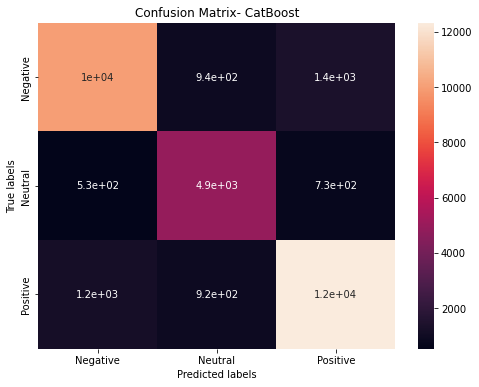

In [ ]:
# Confusion Matrix
cm5 = confusion_matrix(y_train, y_pred_cb_train)
print(cm5)

# Plot No- 37
ax= plt.subplot()
sns.heatmap(cm5, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix- CatBoost')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Model Performance 
cb_precision = precision_score(y_pred_cb_valid,y_valid, average ='weighted')
cb_recall = recall_score(y_pred_cb_valid, y_valid, average ='weighted')
cb_f1_score = f1_score(y_pred_cb_valid,y_valid,average ='weighted')
print(cb_precision, cb_recall, cb_f1_score)

0.8056938130353086 0.8062439261418853 0.8052870613521248


# **11.  Summary of All Models**

In [ ]:
model_test = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression','Random Forest', 'Naive Bayes','Stochastic Gradient Decent','CatBoost'],
    'Test accuracy': [svm_accuracy, lr_accuracy,rf_accuracy, NB_accuracy,sgd_accuracy,catboost_accuracy],
    'Recall': [svc_recall, lr_recall, rf_recall, NB_recall, sgd_recall, cb_recall],
    'Precision': [svc_precision, lr_precision, rf_precision, NB_precision, sgd_precision, cb_precision],
    'F1-Score': [svc_f1_score, lr_f1_score, rf_f1_score, NB_f1_score, sgd_f1_score, cb_f1_score]
    })
model_test.sort_values(by='Test accuracy', ascending=False)
model_test

,Model,Test accuracy,Recall,Precision,F1-Score
0,Support Vector Machines,0.791545,0.791545,0.791029,0.791169
1,Logistic Regression,0.795675,0.795675,0.795269,0.795460
2,Random Forest,0.762755,0.762755,0.764281,0.762980
3,Naive Bayes,0.684524,0.684524,0.747144,0.705568
4,Stochastic Gradient Decent,0.809888,0.809888,0.809558,0.809685
5,CatBoost,0.806244,0.806244,0.805694,0.805287


### **Test Accuracy of all used Models**

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

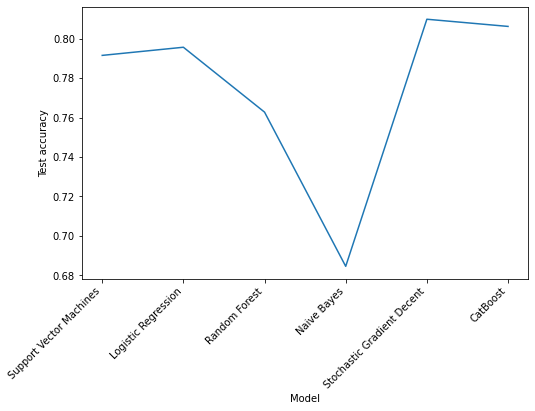

In [ ]:
# Plot No - 38
# Creating plot between Test accuracy and all 6 models used
plt.figure(figsize=(8,5))
sns.lineplot(data=model_test, x='Model', y='Test accuracy')
plt.xticks(rotation=45, ha='right')

### **Overall range of different test scores of all used models**

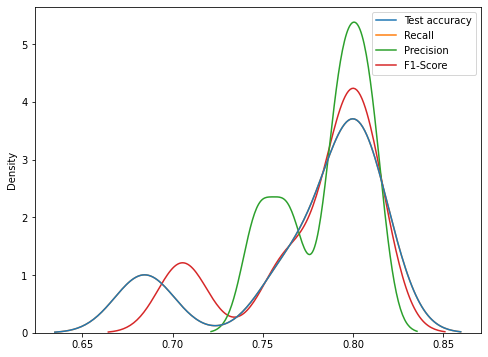

In [ ]:
# Plot No - 39
# Creating plot for all 6 models with test accuracy and all used score like recall, precision and f-1 score 
sns.kdeplot(data= model_test,bw_adjust=.5)

# **12.  Conclusions**

### **On EDA**


*    Original dataset contains 6 columns and 41157 rows. <br>
*   ‘Location’ column contains approx. 20.87% of Null values.<br>
*   The columns such as “UserName” and “ScreenName” does not give any meaningful insights for our analysis.
*   In order to analyse the data we required only two columns "OriginalTweet" & "Sentiment". Hence, to avoid NaN values in "Location" columns we didnot used it further.
*   There are five types of sentiments- Extremely Negative, Negative, Neutral, Positive and Extremely Positive. So, we merged Extremely Positive with positive and Extremely Negative with Negative. And use encoding with value ‘-1’ for negative, ‘0’ for neutral and ‘1’ for positive. 
*  All tweets data collected between months of March and April 2020 and of around 30 days.
*  Most of the tweets came from London followed by U.S.
*  Among top 10 mentions in tweets realDolandTrump was the top mentioned name and "#coronavirus" was most trendiest hashtag that was trending during that period. 





### **On Model Training** 

* At the end we conclude that in our project with 6 models namely Naive Bayes Classifier,Stochastic Gradient Descent, Random Forest Classifier,Support Vector Machine, Logistic Regression and CatBoost. We are getting the highest test accuracy of about **80.98%** with **Stochastic Gradient Descent**.
* And also after the use of gridsearchCV their is not much improvement came in the test model accuracy. 